## Logistic Regression

### Aim
Given a set of X inputs we want to assign them one of two possible categories (0,1). Logistic regression models the probability that each input belongs to a particular category.

### Are we still solving a Linear Equation?
Yes! The principle behind logistic regression still stands as trying to solve a linear equation. We need to estimate the best 'weights' which when combined with our input values (or independent variables) - gives us an estimation of our dependent variable (our output classification). The only difference is that a linear equation will give us a number, whereas we want a classification.

$$z = W_0 + W_1X_1 + W_2X_2 + ... + W_nX_n$$

However, here we will transform the output using a sigmoid function. to return a probability value between 0 and 1. Let's experiment with a sample dataset.

### IRIS Dataset
The IRIS dataset is a well known starting exercise for classification models. It contains 3 classes of 50 instances each, representing a different type of the Iris plant. The dataset contains different features about the plant:

- Sepal Length
- Sepal Width
- Petal Length
- Petal Width

These are our independent vectors. The last column of the dataset is our independent vector - the classes for each instance. In this exercise we will only use the first two features (sepal length and sepal width).

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#Loading the sci-kit learn library
from sklearn import datasets
#Loading in the IRIS dataset
iris = datasets.load_iris()
#Filtering out only the first two feature vectors
X = iris.data[:,:2]
#We're only going to be differentiating between two classes
#so we'll combine the second and third class into one
y = (iris.target !=0)*1
y = y.reshape(y.shape[0],1)

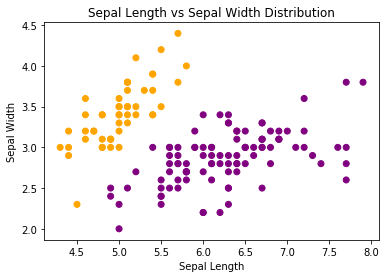

In [2]:
colors= ['orange' if l == 0 else 'purple' for l in y]
plt.scatter(X[:,0],X[:,1],color = colors)
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Sepal Length vs Sepal Width Distribution")
plt.show()

We can see from this scatter plot that the two classes seem to be easily linearly separable. Let's get to work to find the right linear combination of weights and inputs which will help us classify these two types of iris plants correctly.

In [3]:
#Let's start by creating a function to initialize the weights
#For our first attempt let's initialize the weights to 0
def initialize_weights(features, random = True):
    '''
    Arguments:
        features -- input matrix (n x m) for our feature set
    Output:
        Returns a zero vector of shape (m x 1)
    '''
    if random == True:
        theta = np.random.rand(features.shape[1]).reshape(features.shape[1],1)
    elif random == False:
        theta = np.zeros(features.shape[1]).reshape(features.shape[1],1)
    return theta

#Let's add in the intercept terms to our input matrix.
#The intercept term is the garbage collector of our model.
#It accounts for any bias that is not accounted for by the terms in the model.
def add_intercept(features):
    '''
    Arguments:
        features -- input matrix (n x m) for our feature set
    Output:
        Returns an input matrix of shape (n x m+1) with a column
        of 1's appended to the matrix
    '''
    intercept = np.ones((features.shape[0],1))
    return np.concatenate((intercept, features), axis = 1)

#Adding the intercept term
X_ = add_intercept(X)
#Initializing the weights matrix
theta_ = initialize_weights(X_, random=False)

#Let's look at the shapes of our input matrix X and
#our weights matrix theta
print(f"Shape of Input Matrix X: {X_.shape}")
print(f"Shape of Weights Matrix theta: {theta_.shape}")

Shape of Input Matrix X: (150, 3)
Shape of Weights Matrix theta: (3, 1)


### How to convert to a probability?
A function takes inputs and returns outputs. To generate probabilities, we have to use a function which takes in any kind of input and returns it in terms of a probability -- oscillating between 0 and 1.

#### Sigmoid
The idea behind <em>logistic regression</em> is that we want to use the values from the linear combination of our independent and dependent variables to classify our data. However, values generated through a linear equation will not fall in the scope of 0-1 probabilities. To convert the data into values between 0 and 1, we use a <em>sigmoid function</em>.

A sigmoid funtion has a characteristic S-shaped curve, which means it oscillates between 0 and 1. We can convert our linear equation values into a probability using a sigmoid function. These probability values can then be used to give us a 0 or 1 binary classification. 

Here's an example of a common sigmoid function, known as the <em>logistic function</em>:
<table>
    <tr><td width = "250px">
        $$h_\theta(x) = {1\over{1+e^{-\theta^T x}}}$$
        </td>
        <td width = "50%">
        $$\begin{cases}
\text{if } y = 1, \text{we want }h_\theta \approx 1 , \theta^Tx >> 0
\\
            \text{if } y = 0, \text{we want }h_\theta \approx 0, \theta^Tx << 0
            \end{cases}$$</td></tr>
            <tr><td>where $\theta$ is the weights vector and $x$ is the input vector</td></tr>
</table>

Another example is the <em>hyperbolic tangent</em> function (also known as the <em>tanh</em> function). It is a rescaled logistic function where the outputs range between -1 and 1. It is more useful for neural networks. The advantage it holds over the logistic function is that the negative inputs will be mapped strongly negative and the zero inputs will be mapped near zero in the tanh graph.

<table>
    <tr><td width = "250px">
        $$h_\theta(x) = {tanh_\theta(x)} = {{e^{\theta^T x} - e^{-{\theta^T x}}}\over{e^{\theta^T x} + e^{-{\theta^T x}}}}$$
        </td>
        <td width = "50%">
        $$\begin{cases}
\text{if } y = 1, \text{we want }h_\theta \approx 1 , \theta^Tx >> 0
\\
            \text{if } y = 0, \text{we want }h_\theta \approx -1, \theta^Tx << 0
            \end{cases}$$</td></tr>
            <tr><td>where $\theta$ is the weights vector and $x$ is the input vector</td></tr>
</table>


Let's see how the sigmoid function maps out on a plot.

In [4]:
#Defining the sigmoid functions
def sigmoid_logistic(x):
    '''
    Arguments:
        x -- Product of weight and input feature (or vector)
    Output:
        Returns the sigmoid of the product (vector)
    '''
    return 1/(1+np.e**(-x))

def sigmoid_tanh(x):
    '''
    Arguments:
        x -- Product of weight and input feature (or vector)
    Output:
        Returns the sigmoid of the product (vector)
    '''

    return (np.e**x - np.e**(-x))/(np.e**x + np.e**(-x))

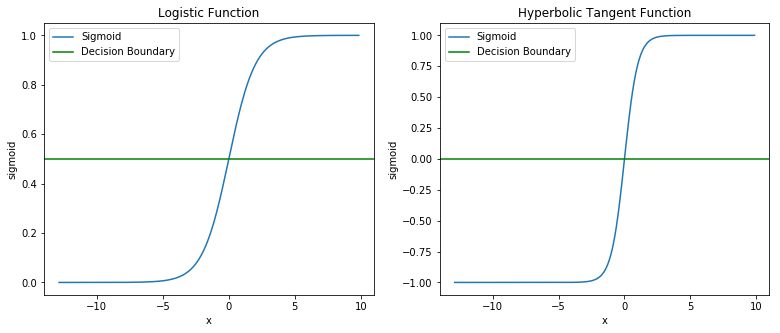

In [5]:
#Creating an array
# x = np.arange(-10,11,0.001)
x = np.random.normal(0,3,10000)
x.sort()
#Using the sigmoid on the array
z1 = sigmoid_logistic(x)
z2 = sigmoid_tanh(x)
#Plot
f = plt.figure(figsize=(13,5))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(x,z1)
ax1.axhline(0.5, color = "green")
ax1.legend(["Sigmoid","Decision Boundary"])
ax1.set_xlabel("x")
ax1.set_ylabel("sigmoid")
ax2.plot(x,z2)
ax2.axhline(0, color = "green")
ax2.legend(["Sigmoid","Decision Boundary"])
ax2.set_xlabel("x")
ax2.set_ylabel("sigmoid")
ax1.set_title("Logistic Function")
ax2.set_title("Hyperbolic Tangent Function")
plt.show()

As we can see the function oscillates between 0 and 1 for any range of inputs. We use the output of the sigmoid function to classify our samples depending on whether the sigmoid ouput is above or below a specified threshold. In this case we can classify anything above our decision boundary as 1 and anything below as 0.

#### Predict
Now, let's creat the predict function. It will find the dot product between the weights matrix and the input matrix and then use the sigmoid function to find the probability of each input row of being part of class 1 or 0.

In [6]:
def predict(features, weights):
    '''
    Returns 1 dimensional array of probabilities
    for class label == 1
    '''    
    z = np.dot(features, weights)
    return sigmoid_logistic(z)

#Let's test it and see what we get
predictions_ = predict(X_,theta_)
print(f"Shape of predictions: {predictions_.shape}")

Shape of predictions: (150, 1)


### Evaluating our prediction
#### Cost Function
The cost funtion is used to identify how good our prediction for a certain sample or a set of samples actually is when compared with the correct classifications. Our prediction is non-linear due to the sigmoid function, hence, we cannot use the L2 loss function. Instead we use the <b>Cross-Entropy</b> (also known as <em>Log Loss</em>) function. It can be thought of as a combination of two separate loss functions, one for $y=1$ and one for $y=0$.

Cost of a single example:
<table>
    <tr><td width = "450px">
$$L_{cost} = {-y\log{1\over{1+e^{-\theta^{T}x}}}} - {(1-y)\log{1-{1\over{1+e^{-\theta^T x}}}}}$$</td>
        <td width = "300px">
            $$\begin{cases}
            \text{if } y=1, \text{we want } \theta^T x >> 0 \\
            \text{if } y=0, \text{we want } \theta^T x << 0
            \end{cases}$$
        </td></tr></table>
        
Total Cost:
<table>
    <tr><td width = "550px">
$$J(\theta) = min_\theta {1\over{m}} \Bigl [ \sum^m_{i=1} y^{(i)} (-log \ h_\theta(x^{(i)})) + (1-y^{(i)}) \ ((-log(1-h_\theta(x^{(i)}))) \Bigr ] + {\lambda\over{2m}} \ {{\sum^n_{i=1} \theta^2_j}} $$</td></tr>
    <tr><td>
        $$\text{where } \lambda \text{ is the regularization parameter}$$</td></tr>
    </table>
    

The benefits of using these loss functions is revealed when we look at their graphs.

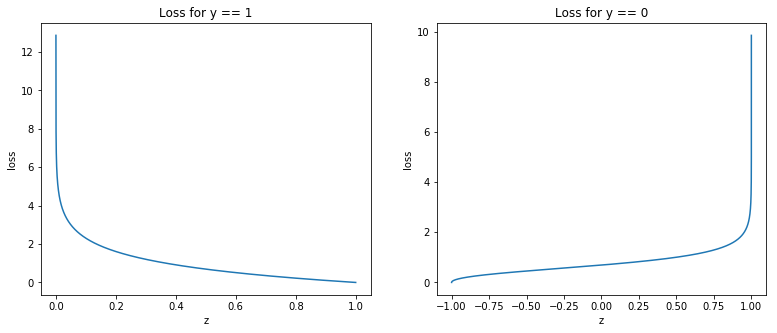

In [7]:
#Defining the loss function for y == 1
def loss_y1(x): return -np.log(x)
#Defining the loss function for y == 0
def loss_y2(x): return -np.log(1-x)

#Calculating the loss
a1_loss = loss_y1(z1)
a2_loss = loss_y2(z1)

#Plot
f = plt.figure(figsize=(13,5))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(z1,a1_loss)
ax1.set_xlabel("z")
ax1.set_ylabel("loss")
ax2.plot(z2,a2_loss)
ax2.set_xlabel("z")
ax2.set_ylabel("loss")
ax1.set_title("Loss for y == 1")
ax2.set_title("Loss for y == 0")
plt.show()

These smooth monotonic functions (always increasing or decreasing) make it easy to calculate the gradient and minimize cost.

In [20]:
#The loss/cost function
def cost_function(features, labels, weights, reg):
    '''
    Using Mean Absolute Error

    Features:(m,n)
    Labels: (m,1)
    Weights:(n,1)
    Returns 1D matrix of predictions
    Cost = ( log(predictions) + (1-labels)*log(1-predictions) ) / len(labels)
    '''
    observations = len(labels)

    predictions = predict(features, weights)

    #Take the error when label=1
    class1_cost = -labels*np.log(predictions)

    #Take the error when label=0
    class2_cost = (1-labels)*-np.log(1-predictions)

    regularization_term = reg/(2*observations) * np.sum(np.square(weights))
    #Take the sum of both costs
    cost = class1_cost + class2_cost + regularization_term

    #Take the average cost
    cost = cost.sum()/observations

    return cost

print(f"Cost of one iteration: {cost_function(X_,y,theta_,0.1)}")

Cost of one iteration: 0.6931471805599454


### Gradient Descent
Gradient Descent is an optimization algorithm used to minimize some function by iteratively moving in the direction of the steepest descent as defined by the negative of the gradient. Consider the 3-dimensional graph below in the context of a cost function. Our goal is to move from the mountain in the top right corner (high cost) to the dark blue sea in the bottom left (low cost). 

<img src = "images/gradient_descent.png">

Starting at the top of the mountain, we take our first step downhill in the direction specified by the negative gradient. Next we recalculate the negative gradient (passing in the coordinates of our new point) and take another step in the direction it specifies. We continue this process iteratively until we get to the bottom of our graph, or to a point where we can no longer move downhill–a local minimum. [<a href = "https://youtu.be/5u0jaA3qAGk">Image Source</a>]

<img src = "images/gradient_descent_demystified.png">

#### Learning Rate
The size of these steps is called the learning rate. With a high learning rate we can cover more ground each step, but we risk overshooting the lowest point since the slope of the hill is constantly changing. With a very low learning rate, we can confidently move in the direction of the negative gradient since we are recalculating it so frequently. A low learning rate is more precise, but calculating the gradient is time-consuming, so it will take us a very long time to get to the bottom.

$$ {\delta{J(\theta)}\over{\delta\theta_j}} = {1\over{m}} \ X^T (g(X\theta) - y)$$
where:
- m -- number of observations
- X -- feature vector
- y -- labels
- $\theta$ -- weights
- g(X$\theta$) -- predictions

In [21]:
#Gradient Descent
def update_weights(features, labels, weights, lr):
    '''
    Vectorized Gradient Descent

    Features:(200, 3)
    Labels: (200, 1)
    Weights:(3, 1)
    '''
    N = len(features)

    # Get Predictions
    predictions = predict(features, weights)

    # Transpose features from (n, m) to (m, n)
    # So we can multiply w the (n,1)  cost matrix.
    # Returns a (m,1) matrix holding m partial derivatives --
    # one for each feature -- representing the aggregate
    # slope of the cost function across all observations
    gradient = np.dot(features.T,  predictions - labels)

    # Take the average cost derivative for each feature
    gradient /= N

    # Multiply the gradient by our learning rate
    gradient *= lr

    # Subtract from our weights to minimize cost
    weights -= gradient

    return weights


In [22]:
#Creating the decision boundary
def decision_boundary(prob):
    return 1 if prob > 0.5 else 0

#Converting probabilities to classes 
def classify(preds):
    '''
    input - N element array of predictions between 0 and 1
    output - N element array of 0's (false) and 1's (true)
    '''
    #referencing our decision boundary function
    db = np.vectorize(decision_boundary)
    return db(preds).flatten()

#Example output
predictions_ = predict(X_,theta_)
classifications = classify(predictions_)
classifications

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [23]:
#Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state = 42)
print(f"Shape of X_train: {X_train.shape}, Shape of X_test: {X_test.shape},\n \
Shape of y_train: {y_train.shape}, Shape of y_test: {y_test.shape}")

Shape of X_train: (100, 2), Shape of X_test: (50, 2),
 Shape of y_train: (100, 1), Shape of y_test: (50, 1)


In [30]:
#Training code
def train(features, labels, lr, iters, reg):
    cost_history = []
    #Add intercept term to features
    features = add_intercept(features)
    #Initialize weights
    weights = initialize_weights(features,random=False)
    for i in range(iters):
        weights = update_weights(features, labels, weights, lr)
        
        #Calculate error
        cost = cost_function(features, labels, weights,reg)
        cost_history.append(cost)
        
        #Log progress
        if i%1000 == 0:
            print(f"iteration: {i}, cost: {cost}")
            
    return weights, cost_history

W, cost_history = train(X_train, y_train, lr = 0.01, iters = 100000, reg = 0)

iteration: 0, cost: 0.6730850592267553
iteration: 1000, cost: 0.3284160948661242
iteration: 2000, cost: 0.23160468560846176
iteration: 3000, cost: 0.18414885926342756
iteration: 4000, cost: 0.1560660408522386
iteration: 5000, cost: 0.13744679551706873
iteration: 6000, cost: 0.12414906182190767
iteration: 7000, cost: 0.11414463795264541
iteration: 8000, cost: 0.10632386232601056
iteration: 9000, cost: 0.10002803074648405
iteration: 10000, cost: 0.09484098377877898
iteration: 11000, cost: 0.09048655874053489
iteration: 12000, cost: 0.08677407411230434
iteration: 13000, cost: 0.08356749071996601
iteration: 14000, cost: 0.08076705378512211
iteration: 15000, cost: 0.07829788889131384
iteration: 16000, cost: 0.07610265702312456
iteration: 17000, cost: 0.07413667477016965
iteration: 18000, cost: 0.07236458376184618
iteration: 19000, cost: 0.07075802316015278
iteration: 20000, cost: 0.06929396882466961
iteration: 21000, cost: 0.06795352597954506
iteration: 22000, cost: 0.06672103683003776
iter

In [31]:
#Accuracy
def accuracy(predicted_labels, actual_labels):
    diff = predicted_labels - actual_labels
    return 1.0 - (float(np.count_nonzero(diff)) / len(diff))

predictions = classify(predict(add_intercept(X_test),W))
print(f"Accuracy of our classifier: {round(accuracy(predictions.reshape(predictions.shape[0],1),y_test),5)*100}%")

Accuracy of our classifier: 100.0%


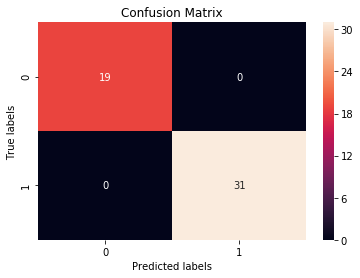

In [32]:
#Plotting the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
tn, fp, fn, tp = confusion_matrix(y_test,predictions).ravel()
cm = confusion_matrix(y_test, predictions)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1']);

In [33]:
#Let's compare with scipy
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Scikit Logistic Regression
scikit_log_reg = LogisticRegression(penalty="l2")
scikit_log_reg.fit(X_train,y_train)

#Score is Mean Accuracy
scikit_score = scikit_log_reg.score(X_test,y_test)
print(f'Scikit score: {scikit_score}')


Scikit score: 1.0


/Applications/anaconda3/envs/cs231n/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
